# 15号线通用设计下模拟

In [1]:
from System_Models import Chiller, Tower, Pump, Fan, Exchanger, AHU
from Environment_Models import Air_Node, Water_Node, Room, Outdoor

In [2]:
#device objects
pumping_head = 10 #m?
Chiller_Evaporator_Cooling_Rate = 666 #kW
Chiller_LS_A1 = Chiller(Chiller_Evaporator_Cooling_Rate)
Chiller_LS_A2 = Chiller(Chiller_Evaporator_Cooling_Rate)

Chiller_LS_A1.T_w_e_E = 12
Chiller_LS_A2.T_w_e_E = 12
Chiller_LS_A1.T_w_e_L = 7
Chiller_LS_A2.T_w_e_L = 7

Chiller_LS_A1.T_w_c_E = 32
Chiller_LS_A2.T_w_c_E = 32
Chiller_LS_A1.T_w_c_L = 37
Chiller_LS_A2.T_w_c_L = 37

#得有cooling pump和chilled pump
#额定还是设计还是最小还是某频率下的？
Cooling_Pump_G = 320.5 #t/h/ #过了全程谁处理仪后好像又变成160.2t/h?
Chilled_Pump_G = 320.5 #t/h
Cooling_Pump_LD_A1 = Pump(pumping_head)
Cooling_Pump_LD_A2 = Pump(pumping_head)
Cooling_Pump_LD_A1.flow_rate = Cooling_Pump_G
Cooling_Pump_LD_A2.flow_rate = Cooling_Pump_G

Chilled_Pump_LQ_A1 = Pump(pumping_head)
Chilled_Pump_LQ_A2 = Pump(pumping_head)
Chilled_Pump_LQ_A1.flow_rate = Chilled_Pump_G
Chilled_Pump_LQ_A2.flow_rate = Chilled_Pump_G


Tower_LT_A1 = Tower()
Tower_LT_A2 = Tower()

Tower_LT_A1.Pump = Pump(pumping_head)
Tower_LT_A2.Pump = Pump(pumping_head)

Exchanger_1 = Exchanger()
Exchanger_2 = Exchanger()



#AHU_KT的风机风量不小于25900 m3/h, 电机频率不小于30HZ
#50Hz下，风量88385m3/h
G_KT = 88385
Fan_1 = Fan(G_KT)
Fan_2 = Fan(G_KT)
AHU_KT_A1 = AHU(Exchanger_1, Fan_1)
AHU_KT_A2 = AHU(Exchanger_2, Fan_2)


#排风凉全都得大雨7200m3/h

#回排风机 50Hz下设计风量 70385m3/h

G_HPF = 70385 # 50Hz额定值
Fan_HPF_A1 = Fan(G_HPF)
Fan_HPF_B1 = Fan(G_HPF)


#小新风机50Hz运行工况 18000m3/h
G_KXF = 18000
Fan_KXF_A1 = Fan(G_KXF)
Fan_KXF_B1 = Fan(G_KXF)


#站厅公共区 86400
G_PY = 86400 #额定值，具体排量需计算
Fan_PY_A1 = Fan(G_PY)



In [3]:
import PIL
import matplotlib.pyplot as plt
icons = {
    "chiller": "icons/zhilengshebei.png",
    "pump": "icons/shuibeng.png",
    "fan": "icons/fengji.png",
    "tower": "icons/shuita.png",
    "air": "icons/wenshiduchuanganqi.png",
    "room": "icons/wodefangjian.png",
    "ahu": "icons/quanrejiaohuan-.png",
    "outside": "icons/tianqikongqizhishu.png",
    "guide": "icons/yk_yuanquan_fill.png"
}
images = {k: PIL.Image.open(fname) for k, fname in icons.items()}

In [4]:
Chilling_Water = Water_Node()
Supply_Water = Water_Node()
Return_Water = Water_Node()
Water_Assembling = Water_Node()
Water_Distributor = Water_Node()

Mix_Air_1 = Air_Node()
Mix_Air_2 = Air_Node()

Recirculating_Air_A = Air_Node()
Recirculating_Air_B = Air_Node()

Air_Distributor_1 = Air_Node()
Air_Distributor_2 = Air_Node()

Exhaust_Air = Air_Node()

Return_Air_A = Air_Node()
Return_Air_B = Air_Node()

Supply_Air = Air_Node()

Outdoor_TK = Outdoor()
Outdoor_Tower = Outdoor()


Hall = Room()
Platform = Room()

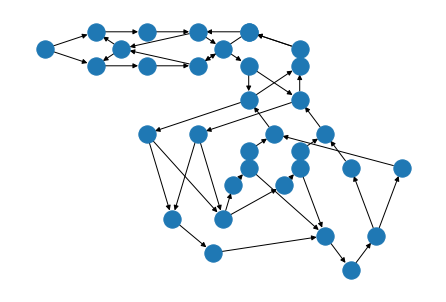

In [5]:
import networkx as nx


# Guide 下要再划分

G = nx.MultiDiGraph()

G.add_node('Tower_LT_A1', pos = (0, 10), type = 'Tower', image = images['tower'], object = Tower_LT_A1)
G.add_node('Tower_LT_A2', pos = (0, 9), type = 'Tower', image = images['tower'], object = Tower_LT_A2)
G.add_node('Chilled_Pump_LQ_A1', pos = (1, 10), type = 'Pump', image = images['pump'], object = Chilled_Pump_LQ_A1)
G.add_node('Chilled_Pump_LQ_A2', pos = (1, 9), type = 'Pump', image = images['pump'], object = Chilled_Pump_LQ_A2)

G.add_node('Chiller_LS_A1', pos = (2,10), type = 'Chiller', image = images['chiller'], object = Chiller_LS_A1)
G.add_node('Chiller_LS_A2', pos = (2,9), type = 'Chiller', image = images['chiller'], object = Chiller_LS_A2)


G.add_node('Chilling_Water', pos = (0.5, 9.5), type = "Guide", image = images['guide'], object = Chilling_Water)

G.add_node('Supply_Water', pos = (2.5, 9.5), type = "Guide", image = images['guide'], object = Supply_Water)

G.add_node('Cooling_Pump_LD_A1', pos = (3, 10), type = "Pump", image = images['pump'], object = Cooling_Pump_LD_A1)
G.add_node('Cooling_Pump_LD_A2', pos = (3, 10), type = "Pump", image = images['pump'], object = Cooling_Pump_LD_A2)

G.add_node('Return_Water', pos = (4, 9.5), type = 'Guide', image = images['guide'], object = images['guide'])

G.add_node('Water_Assembling', pos = (4, 9), type = 'Guide', image = images['guide'], object = Water_Assembling)

G.add_node('Water_Distributor', pos = (3, 9), type = 'Guide', image = images['guide'], object = Water_Distributor)

G.add_node('AHU_KT_A1', pos = (3, 8), type = 'AHU', image = images['ahu'], object = AHU_KT_A1)
G.add_node('AHU_KT_A2', pos = (4, 8), type = 'AHU', image = images['ahu'], object = AHU_KT_A2)

G.add_edges_from([('Tower_LT_A1', 'Chilled_Pump_LQ_A1'),('Chilled_Pump_LQ_A1', 'Chiller_LS_A1'), ('Chiller_LS_A1', 'Supply_Water'),
('Tower_LT_A2', 'Chilled_Pump_LQ_A2'),('Chilled_Pump_LQ_A2', 'Chiller_LS_A2'), ('Chiller_LS_A2', 'Supply_Water'), 
('Chiller_LS_A1', 'Chilling_Water'), ('Chilling_Water', 'Tower_LT_A1'),
('Chiller_LS_A2', 'Chilling_Water'), ('Chilling_Water', 'Tower_LT_A2'),
('Supply_Water', 'Water_Distributor'),
('AHU_KT_A1', 'Water_Assembling'), ('Water_Distributor', 'AHU_KT_A1'),
('AHU_KT_A2', 'Water_Assembling'), ("Water_Distributor", "AHU_KT_A2"),
('Water_Assembling', 'Return_Water'), ('Return_Water', 'Cooling_Pump_LD_A1'), ('Return_Water', 'Cooling_Pump_LD_A2'),
('Cooling_Pump_LD_A1', 'Chiller_LS_A1'), ('Cooling_Pump_LD_A2', 'Chiller_LS_A2'),
('Outdoor_Tower', 'Tower_LT_A1'), ('Outdoor_Tower', 'Tower_LT_A2') 
])



G.add_node('Mix_Air_1', pos = (3.5, 7), type = 'Guide', image = images['guide'], object = Mix_Air_1)
G.add_node('Mix_Air_2', pos = (4.5, 7), type = 'Guide', image = images['guide'], object = Mix_Air_2)

G.add_node('Recirculating_Air_A', pos = (3, 6.5), type = 'Guide', image = images['guide'], object = Recirculating_Air_A)
G.add_node('Recirculating_Air_B', pos = (4, 6.5), type = 'Guide', image = images['guide'], object = Recirculating_Air_B)

G.add_node('Air_Distributor_1', pos = (1, 7), type = 'Guide', image = images['guide'], object = Air_Distributor_1)
G.add_node('Air_Distributor_2', pos = (2, 7), type = 'Guide', image = images['guide'], object = Air_Distributor_2)

G.add_node('Fan_HPF_A1', pos = (3, 6), type = 'Fan', image = images['fan'], object = Fan_HPF_A1)
G.add_node('Fan_HPF_B1', pos = (4, 6), type = 'Fan', image = images['fan'], object = Fan_HPF_B1)

G.add_node('Return_Air_A', pos = (2.7, 5.5), type = 'Guide', image = images['guide'], object = Return_Air_A)
G.add_node('Return_Air_B', pos = (3.7, 5.5), type = 'Guide', image = images['guide'], object = Return_Air_B)

G.add_node('Exhaust_Air', pos = (4.5, 4), type = 'Guide', image = images['guide'], object = Exhaust_Air)

#车厅 hall
#车台 platform
G.add_node('Hall', pos = (1.5, 4.5), type = 'Environment', image = images['room'], object = Hall)
G.add_node('Platform', pos = (2.5, 4.5), type = 'Environment', image = images['room'], object = Platform)

G.add_node('Fan_KXF_A1', pos = (6, 6), type = 'Fan', image = images['fan'], object = Fan_KXF_A1)
G.add_node('Fan_KXF_B1', pos = (5, 6), type = 'Fan', image = images['fan'], object = Fan_KXF_B1)

G.add_node('Supply_Air', pos = (5.5, 4), type = 'Guide', image = images['guide'], object = Supply_Air)

G.add_node('Outdoor_TK', pos = (5, 3), type = 'Environment', image = images['outside'], object = Outdoor_TK)

G.add_node('Outdoor_Tower', pos = (-1, 9.5), type = 'Environment', image = images['outside'], object = Outdoor_Tower)

G.add_node('Fan_PY_A1', pos = (2.3, 3.5), type = 'Fan', image = images['fan'], object = Fan_PY_A1)

G.add_edges_from([ ('Mix_Air_1', 'AHU_KT_A1'), ('Mix_Air_2', 'AHU_KT_A2'),
('AHU_KT_A1', 'Air_Distributor_1'), ('AHU_KT_A2', 'Air_Distributor_2'),
('Air_Distributor_1', 'Hall'), ('Air_Distributor_2', 'Hall'),
('Air_Distributor_1', 'Platform'), ('Air_Distributor_2', 'Platform'),
('Hall', 'Fan_PY_A1'), ('Fan_PY_A1', 'Exhaust_Air'), 
('Fan_HPF_A1', 'Exhaust_Air'), ('Fan_HPF_B1', 'Exhaust_Air'),
('Exhaust_Air', 'Outdoor_TK'),
('Platform', 'Return_Air_A'), ('Platform', 'Return_Air_B'),
('Return_Air_A', 'Fan_HPF_A1'), ('Return_Air_B', 'Fan_HPF_B1'),
('Fan_HPF_A1', 'Recirculating_Air_A'), ('Fan_HPF_B1', 'Recirculating_Air_B'),
('Recirculating_Air_A', 'Mix_Air_1'), ('Recirculating_Air_B','Mix_Air_2'),
('Outdoor_TK', 'Supply_Air'), ('Supply_Air', 'Fan_KXF_A1'), ('Supply_Air', 'Fan_KXF_B1'),
('Fan_KXF_A1', 'Mix_Air_1'), ('Fan_KXF_B1', 'Mix_Air_2'),



])

pos = G.nodes('pos')

nx.draw(G, pos = pos)

<ipython-input-6-143cc689aa29>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])


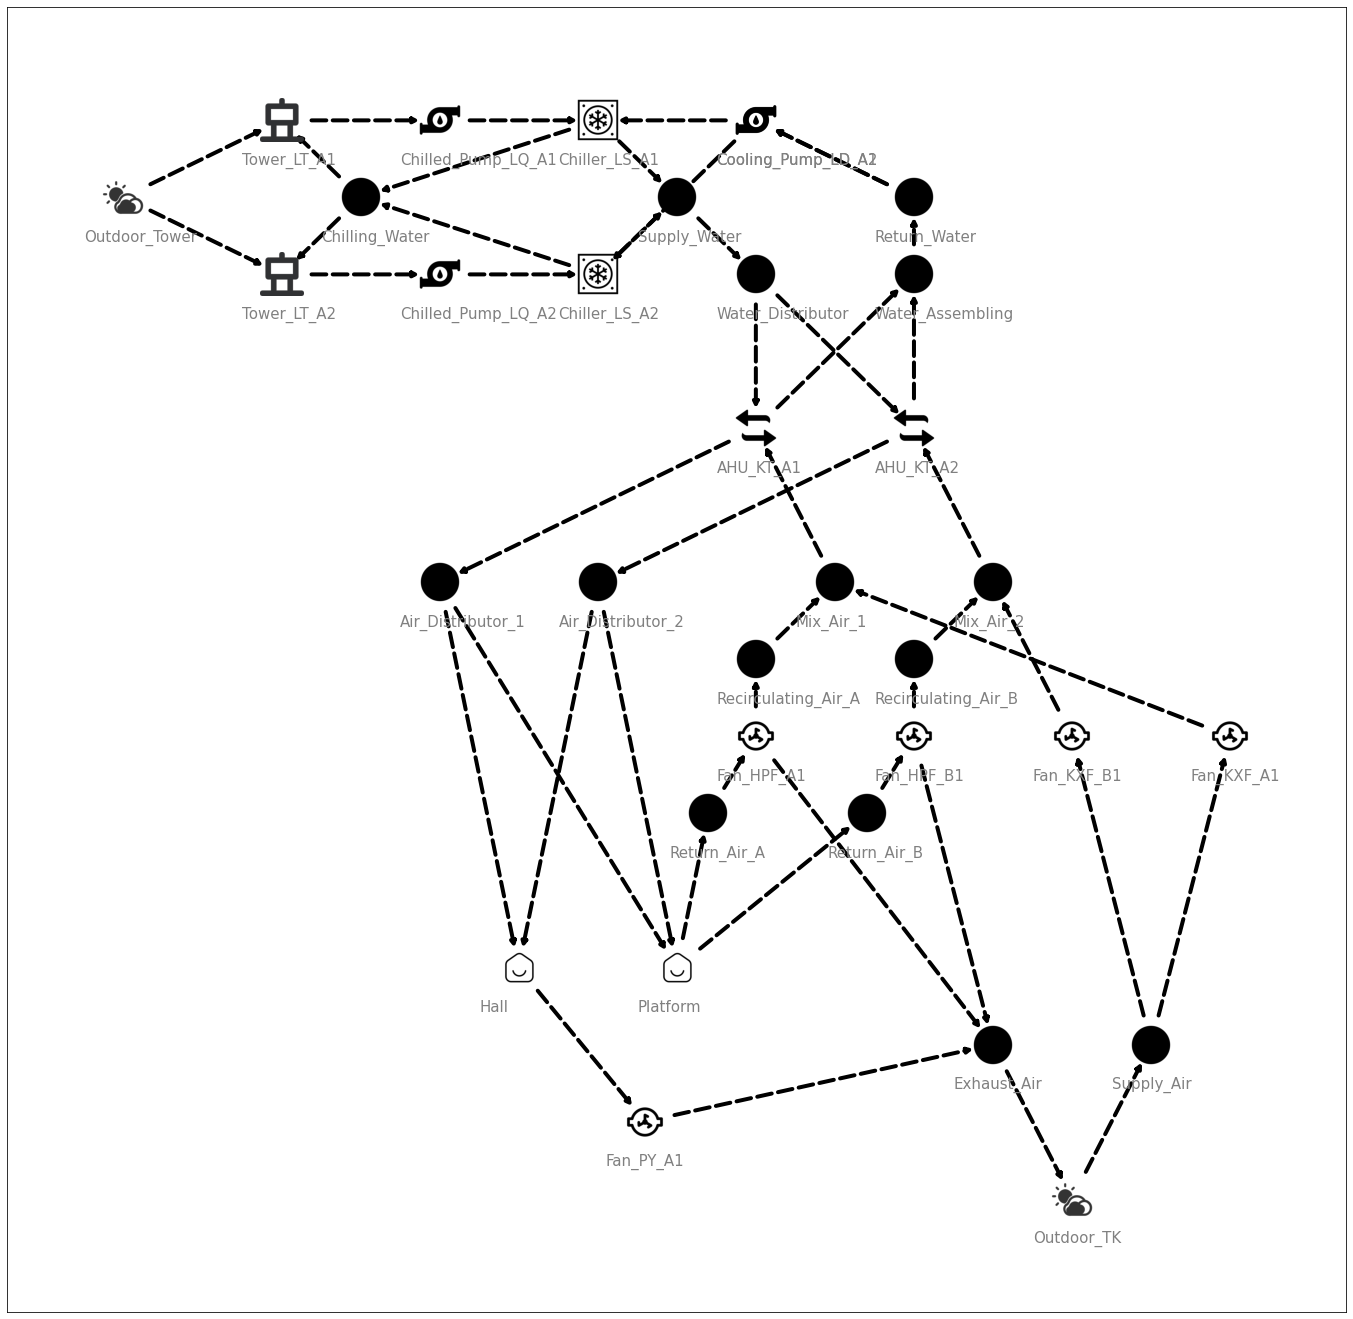

In [6]:
#air_treatment = [ (u,v) for (u, v) in G.edges() if v in ['A']  ]


fig, ax = plt.subplots(figsize = (24, 24))
nx.draw_networkx_edges(
    G,
    pos = pos,
    ax = ax,
    arrows = True,
    arrowstyle = "-|>",
    min_source_margin= 30,
    min_target_margin= 20,
    width = 4,
    style = 'dashed',
    #edge_color = 'y'
)


trf_figure = ax.transData.transform

trf_axes = fig.transFigure.inverted().transform

icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.003
icon_center = icon_size / 2.0
#G.add_node('Chiller', pos = (7, 6), type = 'device', object = Chiller_1, image = images["chiller"])
#G.add_node('Chiller 2', pos = (7, 3), type = 'device', object = Chiller_2, image = images["chiller"])


#add the respective image to each node

for n in G.nodes:
    xf, yf = trf_figure(pos[n])
    xa, ya = trf_axes((xf, yf))
    #get overlapped axes and plot icon
    if G.nodes('type')[n] == 'guide':
        a = plt.axes([xa - icon_center/2, ya - icon_center/2, icon_size/2, icon_size/2])
        plt.text(xa -  icon_center/2 - 350, ya - icon_center/2 + 350, n,fontsize = 15, color = 'grey')
    else:
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        plt.text(xa -  icon_center - 80, ya - icon_center + 300, n,fontsize = 15, color = 'grey')
    
    #plt.text(xa - 50, ya + 250, n,fontsize = 15)
    try:
        a.imshow(G.nodes[n]["image"])
    except:
        print(n)
    a.axis("off")


plt.show()

In [7]:
# 需要有微局部风机与环境参数观测点的对应关系设置
# 分配权数/ 
# 主要挑战是能否实现实时的环境参数探测和联动，如果站内不行，那就只看回风温度

In [8]:
#整体上
# 夏天：温度小于设定值，风机变频器调小风量 or 电动二通阀关小点这样限制经过AHU的冷冻水量（限制公式？）


In [9]:
#回风温度 对比 设定回风温度/ 夏天 站厅29C， 站台28C，相对湿度45-70%
## -> TK的电动调节阀

#冷冻水系统 室内总冷负荷，供水温度，回水温度，压差 etc
## -> Chiller开启否，水泵频率，

# 总冷负荷 < 85% * 单台内机额定工况制冷量 : 开一台
# 总冷负荷 >= ...: 开两台
# 


In [13]:
#输入参数
## 回风温湿度 
## 新风温湿度
## 水塔温湿度+焓值
## 水塔风速
## 站内人数分布
## 需求制冷量

hall_Q = 500#kW 
platform_Q = 500 #kw
#夸大值

#总负荷就是两者加起来，虽然只有站台的热量会参与换热
ahu_1_T_w_L = 25
ahu_2_T_w_L = 27


#室外环境or
G_tower_a = 1000
h_a_E = 400
h_as_E = 500

if hall_Q + platform_Q < Chiller_LS_A1.Qe_max * 0.85:#暂时只考虑站台和站厅
      #这里是多部件联合控制/因为它们之间存在一定联系
    print('1')

    Chiller_LS_A1.T_w_e_E = 0.5 * (ahu_1_T_w_L + ahu_2_T_w_L) #假设全都往它走
    Chiller_LS_A1.Qe = hall_Q + platform_Q
    #计算出合适的冷冻水泵水速 / 之后可能得换成频率/ 具体需要跟那边人了解
    Cooling_Pump_LD_A1.flow_rate = 280.5 #t/h
    Cooling_Pump_LD_A1.run_pump(Cooling_Pump_LD_A1.flow_rate)
    #跑一个即可
    Chiller_LS_A1.G_w_e = Cooling_Pump_LD_A1.flow_rate 
    Tower_LT_A1.G_w = Cooling_Pump_LD_A1.flow_rate
    Chiller_LS_A1.Tower = Tower_LT_A1
    

    r1 = Chiller_LS_A1.Qe / Chiller_LS_A1.Qe_max

    #estimated最佳Te 和 r
    Te = 25

    #estimated最适合T_tower_w_E
    T_tower_w_E = 26
    T_tower_w_L = 23
    
    #estimated best Gw,c
    G_w_c = 260

    Chilled_Pump_LQ_A1.flow_rate = G_w_c * 1.2
    Chilled_Pump_LQ_A1.run_pump(Chilled_Pump_LQ_A1.flow_rate)
    #Chilled_Pump_LQ_A2.flow_rate = G_w_c * 0.9
    
    #Chiller_LS_A1.run_core(r1, Te, T_tower_w_E, h_a_E, h_as_E, G_tower_a, Tower_LT_A1.G_w, epsilon = 0.1)
    Chiller_LS_A1.simple_run(r1, Te, T_tower_w_E, T_tower_w_L)

elif hall_Q + platform_Q >= Chiller_LS_A1.Qe_max * 0.85:
    print('2')

    Chiller_LS_A1.T_w_e_E = 0.5 * (ahu_1_T_w_L + ahu_2_T_w_L) #可能需要结合上一时刻的流量
    Chiller_LS_A2.T_w_e_E = 0.5 * (ahu_1_T_w_L + ahu_2_T_w_L)

    Chiller_LS_A1.Qe = 0.5 * (hall_Q + platform_Q)
    Chiller_LS_A2.Qe = 0.5 * (hall_Q + platform_Q)

    #estimeted最佳Gwe
    Cooling_Pump_LD_A1.flow_rate = 289
    Cooling_Pump_LD_A2.flow_rate = 270

    Cooling_Pump_LD_A1.run_pump(Cooling_Pump_LD_A1.flow_rate)
    Cooling_Pump_LD_A2.run_pump(Cooling_Pump_LD_A2.flow_rate)


    #假设冷冻水泵Gwe与制冷机和水塔的水速无损失相同/ 与Te，Ncomp息息相关 + 限制条件：最低水速or频率 + 热损失 + 性能曲线
    Chiller_LS_A1.G_w_e = Cooling_Pump_LD_A1.flow_rate 
    Chiller_LS_A2.G_w_e = Cooling_Pump_LD_A2.flow_rate

    Tower_LT_A1.G_w = Cooling_Pump_LD_A1.flow_rate
    Tower_LT_A2.G_w = Cooling_Pump_LD_A2.flow_rate

    # Te 与 r
    Te1 = 28
    Te2 = 26
    r1 = Chiller_LS_A1.Qe / Chiller_LS_A1.Qe_max
    r2 = Chiller_LS_A2.Qe / Chiller_LS_A2.Qe_max

    #estimated Gw,c and T_tower_w_E
    T_tower_w_E_1 = 27
    T_tower_w_E_2 = 28
    T_tower_w_L_1 = 24
    T_tower_w_L_2 = 25
    G_w_c_1 = 280
    G_w_c_2 = 300

    Chiller_LS_A1.Tower = Tower_LT_A1
    Chiller_LS_A2.Tower = Tower_LT_A2

    Chilled_Pump_LQ_A1.flow_rate = G_w_c_1
    Chilled_Pump_LQ_A2.flow_rate = G_w_c_2
    Chiller_LS_A1.G_w_c = G_w_c_1
    Chiller_LS_A2.G_w_c = G_w_c_2

    Chilled_Pump_LQ_A1.run_pump(Chilled_Pump_LQ_A1.flow_rate)
    Chilled_Pump_LQ_A2.run_pump(Chilled_Pump_LQ_A2.flow_rate)

    Chiller_LS_A1.simple_run(r1, Te1, T_tower_w_E_1, T_tower_w_L_1)
    Chiller_LS_A2.simple_run(r2, Te2, T_tower_w_E_2, T_tower_w_L_2)


Chiller_LS_A1.Ncom + Chilled_Pump_LQ_A1.Npump + Cooling_Pump_LD_A1.Npump
# 控制变量
## 冷冻，冷却，水塔水泵频率
## 回排，新风风机频率
## 负载分配
## 蒸发温度

# 被动变量
## 水塔进水温度
## 蒸发器进水温度 / ahu回水温度
## 冷凝器进出水温度
## 冷凝器整体水温


# 结果
## 水塔排放热量 ～ 冷凝排放热量
## 冷水机组耗能
## 水泵耗能
## 风机耗能
## 环境效应


2


627.8714285714286

In [12]:
Chiller_LS_A1.heat_transfer_coeff(Chiller_LS_A1.G_w_c)

0.0

In [13]:
Chiller_LS_A1.Qe_max

666

In [20]:
state = 0
bool(state + 1)

True